In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [131]:
df= pd.read_csv("C:\\Users\\DELL\\Desktop\\P_284\\Website Vistiors Daywise - Sheet1.csv")
df.head()

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870


In [132]:
# changing the type of "Date" column from object to datetime
df["Date"]= pd.to_datetime(df["Date"])

In [133]:
df.dtypes 

Date              datetime64[ns]
Daily Visitors             int64
dtype: object

In [134]:
df.shape

(173, 2)

In [135]:
df.info

<bound method DataFrame.info of           Date  Daily Visitors
0   2021-01-10            2649
1   2021-02-10            2000
2   2021-03-10            2011
3   2021-04-10            3219
4   2021-05-10            3870
..         ...             ...
168 2022-03-18            2494
169 2022-03-19            2976
170 2022-03-20            2534
171 2022-03-21            3641
172 2022-03-22            4031

[173 rows x 2 columns]>

In [136]:
df.isnull().sum()

Date              0
Daily Visitors    0
dtype: int64

In [137]:
df.duplicated().sum()

0

In [138]:
df.describe()

,Daily Visitors
count,173.000000
mean,2829.907514
std,765.194741
min,1245.000000
25%,2336.000000
50%,2751.000000
75%,3207.000000
max,7165.000000


In [139]:
# Rename the column
# df.rename(columns={'date': 'Date'}, inplace=True)

In [140]:
df.rename(columns={'Daily Visitors': 'Visitors'}, inplace=True)

In [141]:
df

,Date,Visitors
0,2021-01-10,2649
1,2021-02-10,2000
2,2021-03-10,2011
3,2021-04-10,3219
4,2021-05-10,3870
...,...,...
168,2022-03-18,2494
169,2022-03-19,2976
170,2022-03-20,2534
171,2022-03-21,3641


## Outlier Analysis and Removal

In [142]:
import pandas as pd

# Assuming you already have a DataFrame named df

Q1 = df['Visitors'].quantile(0.25)
Q3 = df['Visitors'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Visitors'] < lower_limit) | (df['Visitors'] > upper_limit)]
df = df[~((df['Visitors'] < lower_limit) | (df['Visitors'] > upper_limit))]

# Now df contains the data with outliers removed, and outliers are stored in the 'outliers' DataFrame.

In [143]:
df.shape

(168, 2)

In [144]:
df.dtypes

Date        datetime64[ns]
Visitors             int64
dtype: object

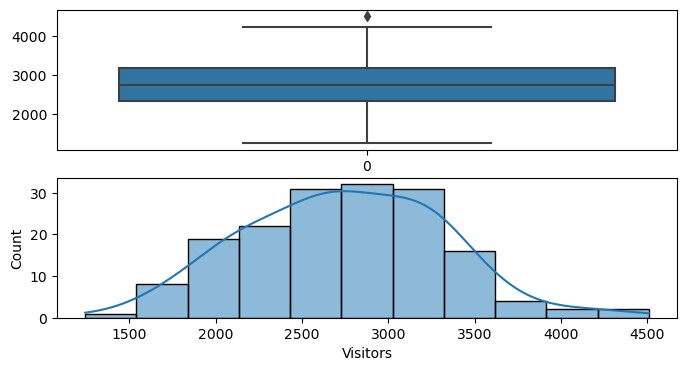

In [145]:
plt.figure(figsize=(8, 4))
plt.subplot(211)
sns.boxplot(df.Visitors)
plt.subplot(212)
sns.histplot(df.Visitors, kde=True)  # You can use histplot with kde=True for a similar visualization
plt.show()

## Checking for Stationarity

Text(0.5, 1.0, 'Visitors Over Time')

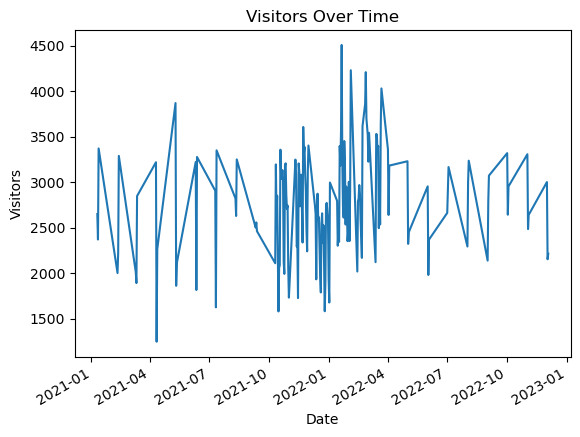

In [146]:
# Create a plot with 'Date' as the x-axis and 'Visitors' as the y-axis
df.plot(x= 'Date', y='Visitors', legend=False)  # legend=False removes the legend
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Visitors Over Time')

In [147]:
# Dickey_fuller test
from statsmodels.tsa.stattools import adfuller

In [148]:
# df.set_index('Date', inplace=True)

In [149]:
df.head()

,Date,Visitors
0,2021-01-10,2649
1,2021-02-10,2000
2,2021-03-10,2011
3,2021-04-10,3219
4,2021-05-10,3870


In [150]:
# Define a function to perform the ADF test and interpret the results
def adf_test(df):
    res = adfuller(df, autolag='AIC')
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    print('Lags: %f' % res[2])

    # Printing the critical values at different alpha levels.
    print('Critical values at different levels:')
    for k, v in res[4].items():
        print('\t%s: %.3f' % (k, v))

    result = 'stationary' if res[1] <= 0.05 else 'non-stationary'
    print(f'Result: The data is {result}')

# Perform the ADF test on the 'visitors' column
adf_test(df['Visitors'])

Augmented Dickey-Fuller Statistic: -2.574181
p-value: 0.098452
Lags: 14.000000
Critical values at different levels:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Result: The data is non-stationary


In [151]:
df1= df

In [102]:
'''# Assuming you already have a DataFrame named df with "Date" and "Visitors" columns

# Apply differencing only to the "Visitors" column
df1['Visitors'] = df1['Visitors'].diff()

# Now, df['Visitors_diff'] contains the differences between consecutive values in the "Visitors" column'''

'# Assuming you already have a DataFrame named df with "Date" and "Visitors" columns\n\n# Apply differencing only to the "Visitors" column\ndf1[\'Visitors\'] = df1[\'Visitors\'].diff()\n\n# Now, df[\'Visitors_diff\'] contains the differences between consecutive values in the "Visitors" column'

In [152]:
import pandas as pd

# Assuming you have a DataFrame named df1 with a 'Visitors' column

# Create a new column to store the differences
df1['Visitors_diff'] = df1['Visitors'].diff()

In [173]:
df1.isnull().sum()

Date               0
Visitors           0
Visitors_diff      0
Visitors_Lagged    0
dtype: int64

In [154]:
df1.dropna(inplace= True)

In [155]:
df1.isnull().sum()

Date             0
Visitors         0
Visitors_diff    0
dtype: int64

In [156]:
df1

,Date,Visitors,Visitors_diff
1,2021-02-10,2000,-649.0
2,2021-03-10,2011,11.0
3,2021-04-10,3219,1208.0
4,2021-05-10,3870,651.0
5,2021-06-10,3222,-648.0
...,...,...,...
168,2022-03-18,2494,-905.0
169,2022-03-19,2976,482.0
170,2022-03-20,2534,-442.0
171,2022-03-21,3641,1107.0


Text(0.5, 1.0, 'Visitors Over Time')

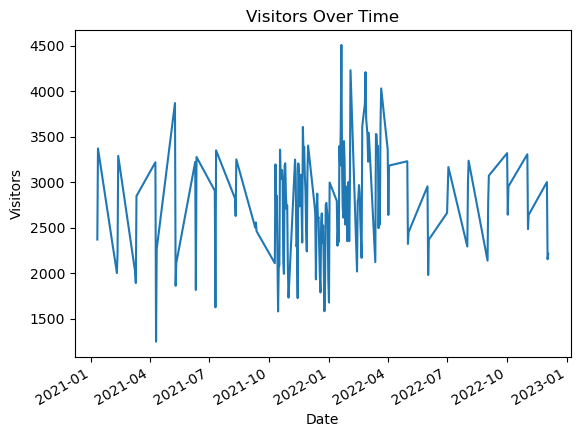

In [157]:
# Create a plot with 'Date' as the x-axis and 'Visitors' as the y-axis
df1.plot(x= 'Date', y='Visitors', legend=False)  # legend=False removes the legend
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Visitors Over Time')

In [28]:
'''adf1= adfuller(df1.dropna())
print('p_value of ADF test is :', adf1[1]) # 0.0002 < 0.05'''

"adf1= adfuller(df1.dropna())\nprint('p_value of ADF test is :', adf1[1]) # 0.0002 < 0.05"

In [159]:
# Define a function to perform the ADF test and interpret the results
def adf_test(df1):
    res = adfuller(df1, autolag='AIC')
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    print('Lags: %f' % res[2])

    # Printing the critical values at different alpha levels.
    print('Critical values at different levels:')
    for k, v in res[4].items():
        print('\t%s: %.3f' % (k, v))

    result = 'stationary' if res[1] <= 0.05 else 'non-stationary'
    print(f'Result: The data is {result}')

# Perform the ADF test on the 'visitors' column
adf_test(df1['Visitors_diff'])

Augmented Dickey-Fuller Statistic: -4.460234
p-value: 0.000232
Lags: 13.000000
Critical values at different levels:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Result: The data is stationary


In [160]:
# Kwiatkowski-Phillips-Schmidt-Shin(KPSS)
from statsmodels.tsa.stattools import kpss

def kpss_test(df1, regression="c", nlags="auto"):
    statistic, p_value, n_lags, critical_values = kpss(df1, regression=regression, nlags=nlags)
    
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    
    result = 'stationary' if p_value >= 0.05 else 'not stationary'
    print(f'Result: The data is {result}')

# Perform the KPSS test on the 'visitors' column with customized arguments
kpss_test(df1['Visitors_diff'], regression="c", nlags="auto")

KPSS Statistic: 0.22559032348597718
p-value: 0.1
num lags: 43
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The data is stationary


#### Based on the findings from both tests, it can be concluded that the time series exhibits stationarity, indicating the absence of both a deterministic trend and seasonality within the series.

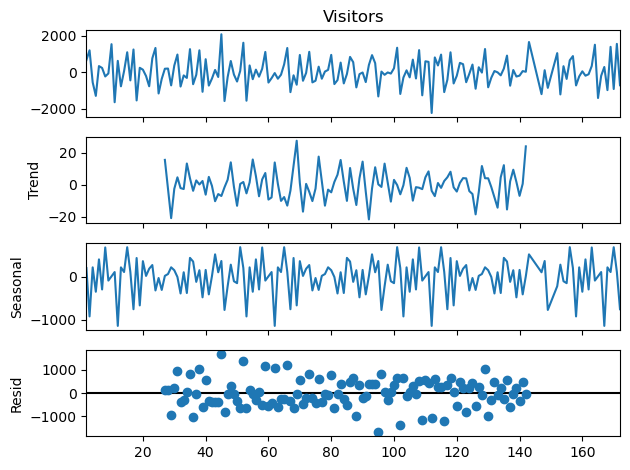

In [78]:
ts_mul = seasonal_decompose(df1.Visitors,model="Additive", period =50)
fig = ts_mul.plot()
plt.show()

## ACF and PACF Plot

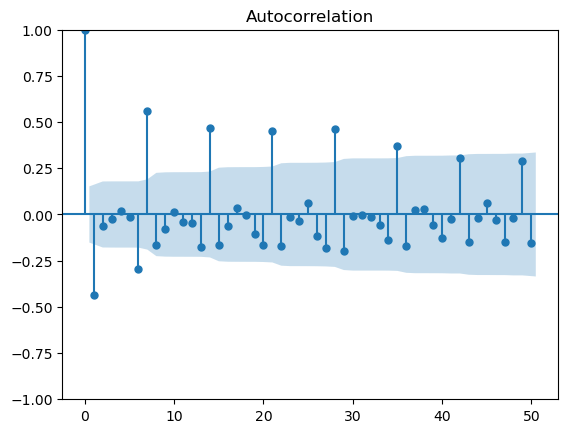

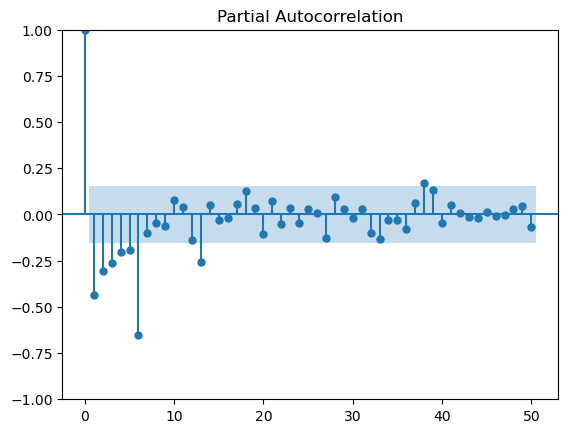

In [79]:
# Create an autocorrelation plot 
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df1.Visitors, lags= 50)
tsa_plots.plot_pacf(df1.Visitors,lags= 50)
plt.show();

## Model Splitting

In [161]:
# Splitting the time series obtained after transformation
X = df1['Visitors_diff']
train, test = np.split(X, [int(0.70 * len(X))])

print("train dimensions", train.shape)
print("test dimensions", test.shape)

train_data, test_data = train, test

train dimensions (116,)
test dimensions (51,)


## Model Building

## 1. ARIMA

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

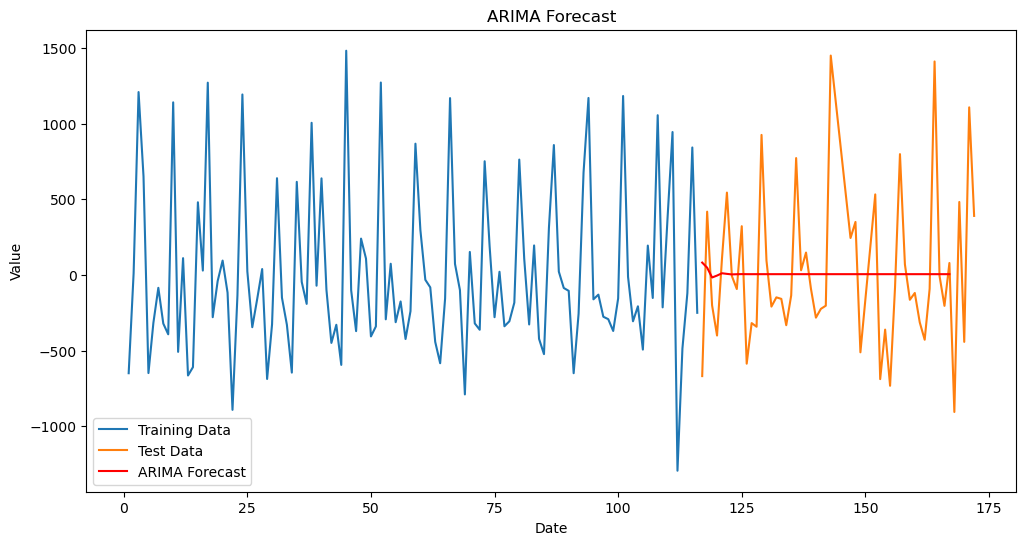

ARIMA Mean Absolute Error: 387.60826975824045
ARIMA Mean Squared Error: 261520.6020603779
ARIMA Root Mean Squared Error: 511.3908505833653


In [163]:
# df = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# ARIMA Model
arima_model = ARIMA(train_data, order=(2, 1, 1))  # Example order (p, d, q)
arima_fit = arima_model.fit()

# Calculate the length of the test_data
test_data_length = len(test_data)

# Set the end argument for predict based on the last date in test_data; Make ARIMA predictions
pred_arima = arima_fit.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')[:test_data_length]

# Calculate evaluation metrics for ARIMA
mae_arima = mean_absolute_error(test_data, pred_arima)
mse_arima = mean_squared_error(test_data, pred_arima)
rmse_arima = np.sqrt(mse_arima)

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(pred_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("ARIMA Forecast")
plt.show()

print("ARIMA Mean Absolute Error:", mae_arima)
print("ARIMA Mean Squared Error:", mse_arima)
print("ARIMA Root Mean Squared Error:", rmse_arima)

In [164]:
# pip install pmdarima

## 2. Exponential Smoothing

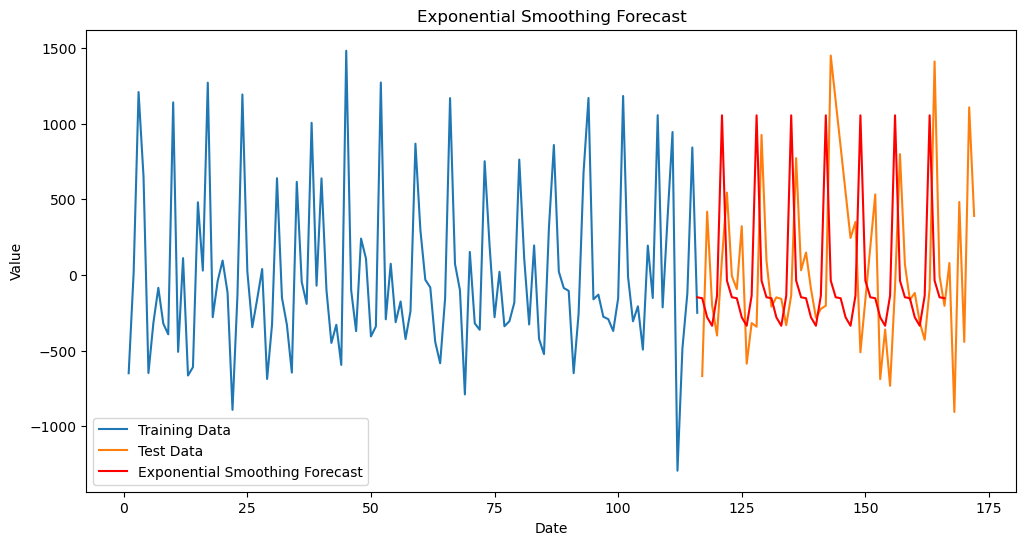

Exponential Smoothing Mean Absolute Error: 355.4415157720352
Exponential Smoothing Mean Squared Error: 293865.93118080316
Exponential Smoothing Root Mean Squared Error: 542.0940242991092


In [165]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your data into a pandas DataFrame
# Ensure that you have a datetime index for time series data
# For example:
# df = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Exponential Smoothing Model
es_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)  # Example settings
es_fit = es_model.fit()

# Make Exponential Smoothing predictions
pred_es = es_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics for Exponential Smoothing
mae_es = mean_absolute_error(test_data, pred_es)
mse_es = mean_squared_error(test_data, pred_es)
rmse_es = np.sqrt(mse_es)

# Plot Exponential Smoothing results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(pred_es, label='Exponential Smoothing Forecast', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Exponential Smoothing Forecast")
plt.show()

print("Exponential Smoothing Mean Absolute Error:", mae_es)
print("Exponential Smoothing Mean Squared Error:", mse_es)
print("Exponential Smoothing Root Mean Squared Error:", rmse_es)

## 3. SARIMA

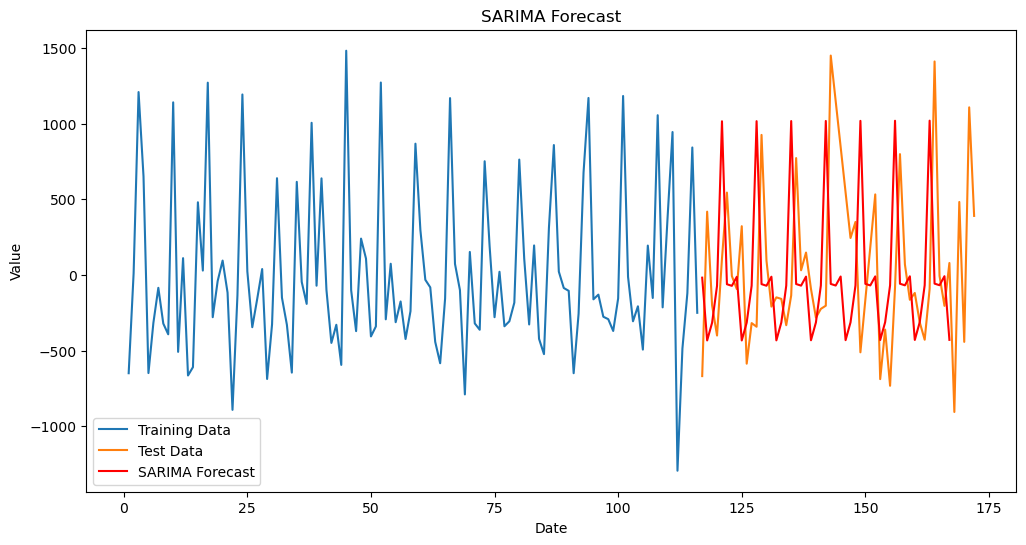

SARIMA Mean Absolute Error: 552.2344142343369
SARIMA Mean Squared Error: 529004.7462404501
SARIMA Root Mean Squared Error: 727.3271246423099


In [166]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA Model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 7))  # Example orders (p, d, q) and seasonal_order (P, D, Q, S)
sarima_fit = sarima_model.fit()

# Calculate the length of the test_data
test_data_length = len(test_data)

# Make SARIMA predictions
pred_sarima = sarima_fit.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')[:test_data_length]

# Calculate evaluation metrics for SARIMA
mae_sarima = mean_absolute_error(test_data, pred_sarima)
mse_sarima = mean_squared_error(test_data, pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)

# Plot SARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(pred_sarima, label='SARIMA Forecast', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("SARIMA Forecast")
plt.show()

print("SARIMA Mean Absolute Error:", mae_sarima)
print("SARIMA Mean Squared Error:", mse_sarima)
print("SARIMA Root Mean Squared Error:", rmse_sarima)

## 4. Holt-Winters Exponential Smoothing model

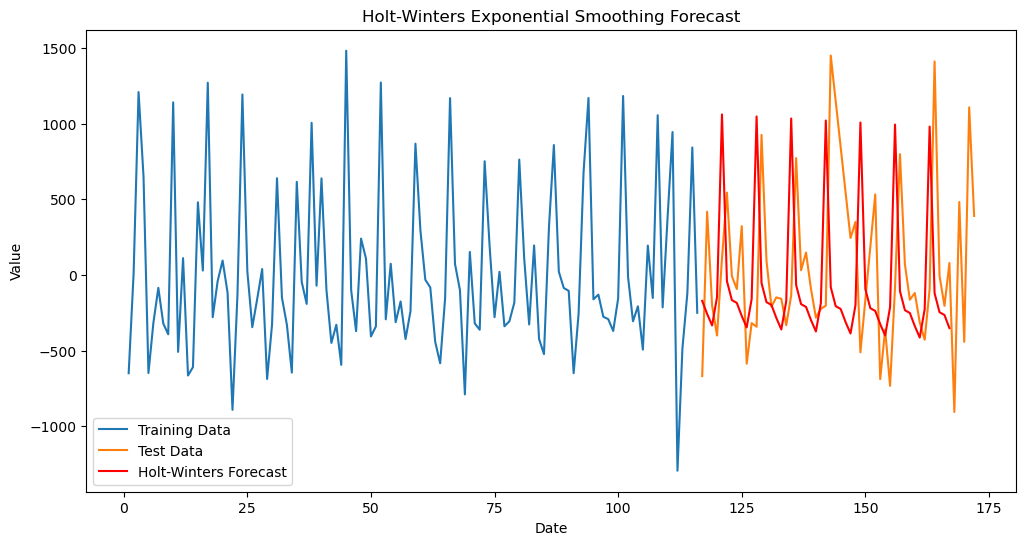

Holt-Winters Mean Absolute Error: 564.1563358420078
Holt-Winters Mean Squared Error: 551935.8705047531
Holt-Winters Root Mean Squared Error: 742.9238658871803


In [167]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure that you have a datetime index for time series data
# For example, you can load your data like this:
# df = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Fit the Holt-Winters Exponential Smoothing model
# You can specify the seasonal component (additive or multiplicative) and the frequency (seasonal period)
# For example, for daily data with yearly seasonality:
hwe_model_add_add = ExponentialSmoothing(train_data, seasonal="add", trend="add", seasonal_periods=7).fit()  # Example configuration

# Calculate the length of the test_data
test_data_length = len(test_data)

# Make Holt-Winters predictions
pred_hwe_add_add = hwe_model_add_add.predict(start=test_data.index[0], end=test_data.index[-1])[:test_data_length]

# Calculate evaluation metrics for Holt-Winters
mae_hwe = mean_absolute_error(test_data, pred_hwe_add_add)
mse_hwe = mean_squared_error(test_data, pred_hwe_add_add)
rmse_hwe = np.sqrt(mse_hwe)

# Plot Holt-Winters results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(pred_hwe_add_add, label='Holt-Winters Forecast', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Holt-Winters Exponential Smoothing Forecast")
plt.show()

print("Holt-Winters Mean Absolute Error:", mae_hwe)
print("Holt-Winters Mean Squared Error:", mse_hwe)
print("Holt-Winters Root Mean Squared Error:", rmse_hwe)

## 5. Random Forest model

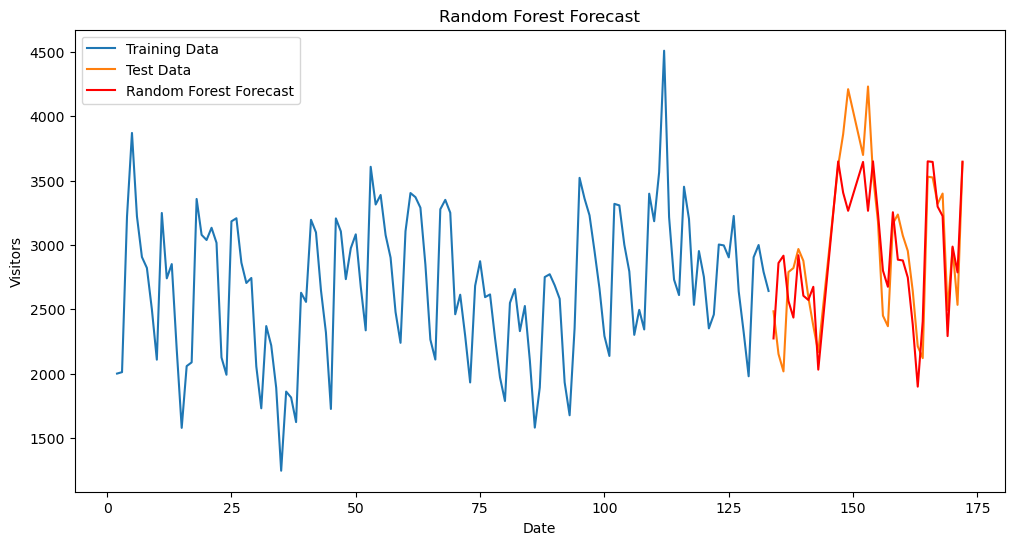

Random Forest Mean Absolute Error: 420.1761764705882
Random Forest Mean Squared Error: 296917.8429147058
Random Forest Root Mean Squared Error: 544.9016818791312


In [168]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Ensure that you have a datetime index for time series data

# Assuming you have one column of numeric values
# Create a lag feature (previous value) for time series data
df['Visitors_Lagged'] = df['Visitors'].shift(1)

# Drop missing values resulting from the lag operation
df.dropna(inplace=True)

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[['Visitors_Lagged']][:train_size], df[['Visitors_Lagged']][train_size:]

# Extract the target variable (the current value)
y_train = df['Visitors'][:train_size]
y_test = df['Visitors'][train_size:]

# Create and train the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)  # Adjust the number of trees as needed
rf_model.fit(train_data, y_train)

# Make predictions with the trained Random Forest model
pred_rf = rf_model.predict(test_data)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Plot Holt-Winters results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(y_test.index, pred_rf, label='Random Forest Forecast', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.title("Random Forest Forecast")
plt.show()

print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Root Mean Squared Error:", rmse_rf)

## 6. LSTM

Epoch 1/50
4/4 - 4s - loss: 6791782.0000 - 4s/epoch - 954ms/step
Epoch 2/50
4/4 - 0s - loss: 5051380.0000 - 38ms/epoch - 10ms/step
Epoch 3/50
4/4 - 0s - loss: 4259049.0000 - 43ms/epoch - 11ms/step
Epoch 4/50
4/4 - 0s - loss: 3506290.0000 - 48ms/epoch - 12ms/step
Epoch 5/50
4/4 - 0s - loss: 3067320.2500 - 51ms/epoch - 13ms/step
Epoch 6/50
4/4 - 0s - loss: 2498789.5000 - 50ms/epoch - 13ms/step
Epoch 7/50
4/4 - 0s - loss: 2096063.1250 - 46ms/epoch - 12ms/step
Epoch 8/50
4/4 - 0s - loss: 1727628.0000 - 56ms/epoch - 14ms/step
Epoch 9/50
4/4 - 0s - loss: 1304274.1250 - 50ms/epoch - 13ms/step
Epoch 10/50
4/4 - 0s - loss: 937661.5625 - 43ms/epoch - 11ms/step
Epoch 11/50
4/4 - 0s - loss: 739728.1250 - 39ms/epoch - 10ms/step
Epoch 12/50
4/4 - 0s - loss: 714870.5000 - 37ms/epoch - 9ms/step
Epoch 13/50
4/4 - 0s - loss: 575142.8125 - 43ms/epoch - 11ms/step
Epoch 14/50
4/4 - 0s - loss: 424507.6250 - 39ms/epoch - 10ms/step
Epoch 15/50
4/4 - 0s - loss: 300990.1250 - 40ms/epoch - 10ms/step
Epoch 16/50


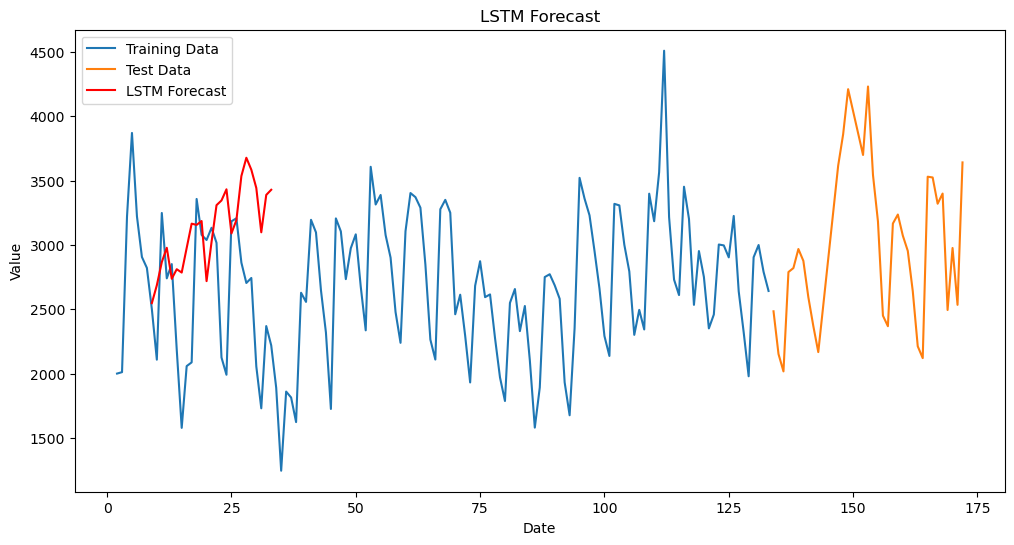

LSTM Mean Absolute Error: 609.955537109375
LSTM Mean Squared Error: 539691.0825523686
LSTM Root Mean Squared Error: 734.6367010654781


In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define hyperparameters
sequence_length = 10  # Length of input sequences
n_epochs = 50  # Number of training epochs
batch_size = 32  # Batch size

# Define a function to create sequences from data
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# Create sequences for LSTM
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

# Define and train the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(train_sequences, train_sequences[:, -1], epochs=n_epochs, batch_size=batch_size, verbose=2)

# Make LSTM predictions on test data
pred_lstm = []
current_sequence = train_sequences[-1:, :, :]  # Use the last training sequence as the initial input
for _ in range(len(test_sequences)):
    next_value = model.predict(current_sequence)[0, 0]
    pred_lstm.append(next_value)
    current_sequence = np.roll(current_sequence, shift=-1, axis=1)
    current_sequence[0, -1, 0] = next_value

# Truncate test_data to match the length of pred_lstm
test_data_truncated = test_data[sequence_length-1:]

# Calculate evaluation metrics for LSTM
mae_lstm = mean_absolute_error(test_data_truncated, pred_lstm)
mse_lstm = mean_squared_error(test_data_truncated, pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

# Plot LSTM results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(range(sequence_length - 1, sequence_length - 1 + len(pred_lstm)), pred_lstm, label='LSTM Forecast', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("LSTM Forecast")
plt.show()

print("LSTM Mean Absolute Error:", mae_lstm)
print("LSTM Mean Squared Error:", mse_lstm)
print("LSTM Root Mean Squared Error:", rmse_lstm)

In [174]:
# Create a Pickle file using serialization
import pickle
pickle_out= open("arima_model1.pkl", "wb")
pickle.dump(arima_model, pickle_out)
pickle_out.close()

In [43]:
'''# Create a Pickle file using serialization
import pickle
pickle_out= open("es_model.pkl", "wb")
pickle.dump(es_model, pickle_out)
pickle_out.close()'''

In [88]:
df1.isnull().sum()

Date                 0
Visitors             0
Original_Visitors    0
Visitors_Lagged      0
dtype: int64

In [170]:
df1

,Date,Visitors,Visitors_diff,Visitors_Lagged
2,2021-03-10,2011,11.0,2000.0
3,2021-04-10,3219,1208.0,2011.0
4,2021-05-10,3870,651.0,3219.0
5,2021-06-10,3222,-648.0,3870.0
6,2021-07-10,2906,-316.0,3222.0
...,...,...,...,...
168,2022-03-18,2494,-905.0,3399.0
169,2022-03-19,2976,482.0,2494.0
170,2022-03-20,2534,-442.0,2976.0
171,2022-03-21,3641,1107.0,2534.0


In [171]:
daily_data= np.array(df1['Visitors'])
daily_data

array([2011, 3219, 3870, 3222, 2906, 2821, 2500, 2108, 3248, 2740, 2851,
       2187, 1578, 2058, 2087, 3357, 3078, 3038, 3133, 3016, 2125, 1991,
       3183, 3207, 2862, 2704, 2743, 2056, 1730, 2369, 2219, 1890, 1245,
       1860, 1814, 1623, 2628, 2557, 3195, 3097, 2648, 2319, 1725, 3206,
       3105, 2734, 2974, 3082, 2676, 2336, 3607, 3314, 3388, 3076, 2901,
       2478, 2239, 3106, 3403, 3371, 3289, 2847, 2264, 2109, 3277, 3350,
       3250, 2461, 2613, 2293, 1931, 2682, 2873, 2594, 2615, 2276, 1970,
       1787, 2549, 2657, 2330, 2525, 2103, 1580, 1892, 2750, 2772, 2686,
       2581, 1932, 1676, 2352, 3521, 3360, 3230, 2954, 2662, 2292, 2137,
       3319, 3307, 3001, 2794, 2301, 2495, 2343, 3398, 3184, 3565, 4509,
       3216, 2730, 2610, 3452, 3202, 2534, 2952, 2751, 2351, 2459, 3003,
       2996, 2903, 3225, 2639, 2321, 1979, 2904, 2999, 2790, 2642, 2484,
       2152, 2017, 2789, 2820, 2968, 2876, 2594, 2370, 2167, 3616, 3860,
       4210, 3699, 4231, 3543, 3182, 2450, 2368, 31

In [172]:
np.savetxt("daily_data.csv", daily_data, delimiter=",")